<a href="https://colab.research.google.com/github/sheldon-o/fare-prediction-ds-project/blob/main/fare_prediction_ds_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

#reading file 


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
#train_data = pd.read_excel("E:\data science\Data_Train.xlsx")
#train_data = pd.read_excel('/Untitled Folder/Data_Train.xlsx')
train_data = pd.read_excel('Data_Train.xlsx')


In [7]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [8]:
train_data.shape

(10683, 11)

task deal with missing values
task data cleaning to make data ready for data anallysis


In [9]:
train_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [11]:
train_data.dropna(inplace=True)

In [12]:
train_data.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [13]:
train_data.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

panda assign data into object so we have to convert them ,,data ,time :data of journey,arrivel time,departure time

In [14]:
def change_into_datetime(col):
  train_data[col] = pd.to_datetime(train_data[col])


In [15]:
train_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [18]:
for i in ['Date_of_Journey', 'Dep_Time', 'Arrival_Time' ]:
  change_into_datetime(i)

In [19]:
train_data.dtypes

Airline                    object
Date_of_Journey    datetime64[ns]
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
dtype: object

to make sure that our program read date and month we seperate them 

##extracting derived feature from data such as duration ,hour,minute of arrival and departure time

In [20]:
train_data['journey_day'] = train_data['Date_of_Journey'].dt.day
train_data['journey_month'] = train_data['Date_of_Journey'].dt.month


In [21]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2021-07-17 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-07-17 05:50:00,2021-07-17 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2021-07-17 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2021-07-17 18:05:00,2021-07-17 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2021-07-17 16:50:00,2021-07-17 21:35:00,4h 45m,1 stop,No info,13302,3,1


In [22]:
train_data.drop('Date_of_Journey',axis = 1 , inplace = True)

In [23]:
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,2021-07-17 22:20:00,2021-03-22 01:10:00,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2021-07-17 05:50:00,2021-07-17 13:15:00,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2021-07-17 09:25:00,2021-06-10 04:25:00,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,2021-07-17 18:05:00,2021-07-17 23:30:00,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,2021-07-17 16:50:00,2021-07-17 21:35:00,4h 45m,1 stop,No info,13302,3,1


dt.hour will extract hour
dt.minute will extract minute 
df.drop will delete (column or row) as you wish

In [28]:
def extract_hour(df,col):
  df[col+'_hour'] = df[col].dt.hour

def extract_minute(df, col):
  df[col+'_minute'] = df[col].dt.minute

def drop_column(df, col):
  df.drop(col,axis = 1,inplace = True)

 


now we call extract_hour, extract_minut, drop_column,these three function will create two new column having hour and minute value and delete one column

In [32]:
extract_hour(train_data,'Dep_Time')
extract_minute(train_data,'Dep_Time')
drop_column(train_data,'Dep_Time')

In [33]:
extract_hour(train_data,'Arrival_Time')
extract_minute(train_data,'Arrival_Time')
drop_column(train_data,'Arrival_Time')

In [35]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Arrival_Time_minute,Dep_Time_minute,Arrival_Time_hour
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,10,20,1
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,15,50,13
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,25,4
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,30,5,23
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,35,50,21


now we process duration time because our machine learning only understand numbers .so we have to convert fetch every single data

but some entries are only in hour or in minute and many are in both

if len is 2 we can use split('')
19h 9m =>split("")
but if len !=2
19h=>19h 0m (19h+" " + "0m"
44m=>0h 44m("0h" + " " + "44m"

converting the column into a list

In [43]:
duration = list(train_data['Duration'])

here i am checking how i will work on duration

In [42]:
 x='2h 50m'
 print(x.split(' '))
 len(x.split(' '))


['2h', '50m']


2

function below will convert every entry in duarion into same foramat
and save it to list "duration"


In [44]:
for i in range(len(duration)):
  if len(duration[i].split(" ")) == 2:
    pass
  else:
    if 'h' in duration[i]:
      duration[i]=duration[i] + ' 0m'
      ##duration[i]= duration[i] +' ' +'0m'
    else:
      duration[i]='0h ' + duration[i]

In [45]:
train_data['Duration'] = duration

In [46]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Arrival_Time_minute,Dep_Time_minute,Arrival_Time_hour
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,10,20,1
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,15,50,13
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,25,4
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,30,5,23
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,35,50,21


In [48]:
## test run on duation
'2h 50m'.split(' ')[0]
'2h 50m'.split(' ')[0][0:-1]

'2'

In [49]:
'2h 50m'.split(' ')[1][0:-1]

'50'

##perform data preprocessing on Duration

In [57]:
def hour(x):
  return x.split(' ')[0][0:-1]

def minute(x):
  return x.split(' ')[1][0:-1]

In [58]:
train_data['Duration_hours'] = train_data['Duration'].apply(hour)
train_data['Duration_mins'] = train_data['Duration'].apply(minute)

In [59]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_day,journey_month,Dep_Time_hour,Arrival_Time_minute,Dep_Time_minute,Arrival_Time_hour,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,10,20,1,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,15,50,13,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,6,9,9,25,25,4,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,30,5,23,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,35,50,21,4,45


In [61]:
drop_column(train_data,'Duration')


In [62]:
train_data.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
journey_day             int64
journey_month           int64
Dep_Time_hour           int64
Arrival_Time_minute     int64
Dep_Time_minute         int64
Arrival_Time_hour       int64
Duration_hours         object
Duration_mins          object
dtype: object

duration hour and duration min still have object type so i have to change it


In [66]:
train_data['Duration_hours'] = train_data['Duration_hours'].astype(int)
train_data['Duration_mins'] = train_data['Duration_mins'].astype(int)

In [67]:
train_data.dtypes

Airline                object
Source                 object
Destination            object
Route                  object
Total_Stops            object
Additional_Info        object
Price                   int64
journey_day             int64
journey_month           int64
Dep_Time_hour           int64
Arrival_Time_minute     int64
Dep_Time_minute         int64
Arrival_Time_hour       int64
Duration_hours          int64
Duration_mins           int64
dtype: object

if we have to know what are our numerical data or what are our contimous feature you can run the following script


variable = [x for x in y if condition]

machine learnig dont work on categorical data so we have to find and process it

In [73]:
 cat_col =[col for col in train_data.columns if train_data[col].dtype=='O']
 cat_col

['Airline', 'Source', 'Destination', 'Route', 'Total_Stops', 'Additional_Info']

In [76]:
count_col = [col for col in train_data.columns if train_data[col].dtype!='O']
count_col

['Price',
 'journey_day',
 'journey_month',
 'Dep_Time_hour',
 'Arrival_Time_minute',
 'Dep_Time_minute',
 'Arrival_Time_hour',
 'Duration_hours',
 'Duration_mins']

created a new varaibe with all the categorical data in below code

In [77]:
categorical = train_data[cat_col]


In [78]:
categorical.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info


In [80]:
categorical['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

.value_counts() will give all the values how many times it repeated

if we have to perform analysis in between airline feature and price or with someother we can use "BOXPLOT"
OR distribution plot

now we use seaborn library



<Figure size 1080x360 with 0 Axes>

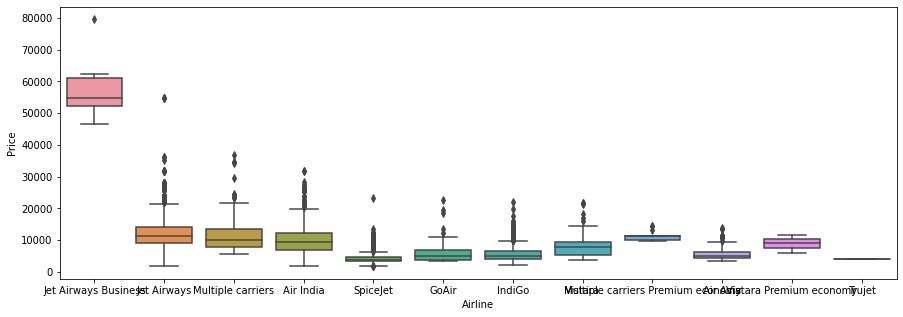

<Figure size 1080x360 with 0 Axes>

In [83]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Airline', y='Price',data=train_data.sort_values('Price',ascending=False))
plt.figure(figsize=(15,5))

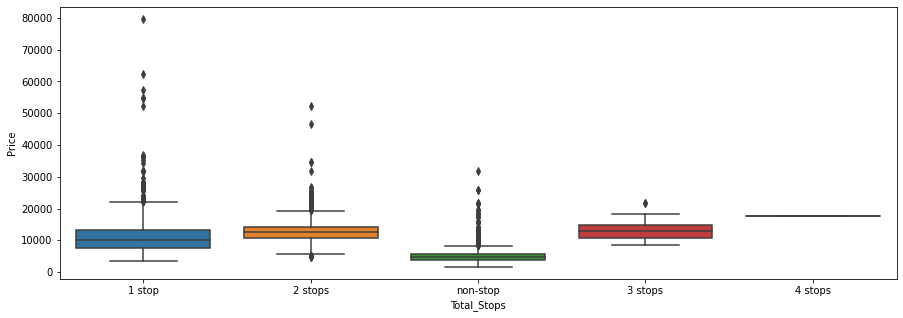

In [84]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Total_Stops', y='Price',data=train_data.sort_values('Price',ascending=False))

pd.get_dummies will convert our categoriacal data into ordinal data

drop_first parameter is used to not to get repetations

In [85]:
Airline = pd.get_dummies(categorical['Airline'],drop_first=True)

In [86]:
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


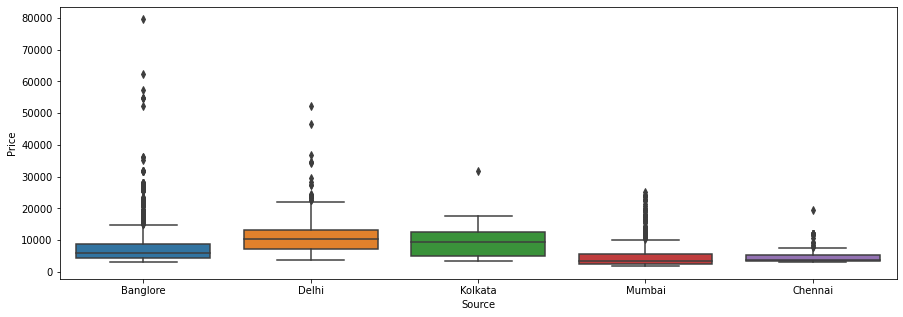

In [87]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Source', y='Price',data=train_data.sort_values('Price',ascending=False))

the above plot shows that flight from banglore have highest varaition in price
and delhi has highest median 


In [88]:
Source = pd.get_dummies(categorical['Source'],drop_first=True)
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


categorical['

In [89]:
categorical['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

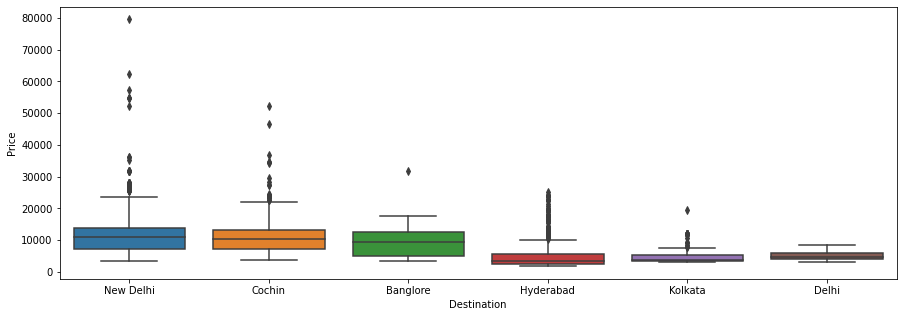

In [91]:
plt.figure(figsize=(15,5))
sns.boxplot(x='Destination', y='Price',data=train_data.sort_values('Price',ascending=False))

In [92]:
Destination = pd.get_dummies(categorical['Destination'],drop_first=True)
Destination.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1
